In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


In [4]:
caminho = '/content/drive/MyDrive/Modulo11/Jef/monthly-beer-production-in-austr.csv'
df = pd.read_csv(caminho)
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [5]:
# 4. Preparar dados para o Prophet
df['Month'] = pd.to_datetime(df['Month'])
df.rename(columns={'Month': 'ds', 'Monthly beer production': 'y'}, inplace=True)


In [6]:
# 5. Criar e treinar o modelo Prophet
modelo = Prophet()
modelo.fit(df)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp03xfjpbk/7v37p2vj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp03xfjpbk/g15g7iyh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50171', 'data', 'file=/tmp/tmp03xfjpbk/7v37p2vj.json', 'init=/tmp/tmp03xfjpbk/g15g7iyh.json', 'output', 'file=/tmp/tmp03xfjpbk/prophet_model9qrt5goo/prophet_model-20250401131437.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:14:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:14:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [7]:
# 6. Criar dataframe futuro para previsões (ex: 24 meses)
futuro = modelo.make_future_dataframe(periods=24, freq='MS')


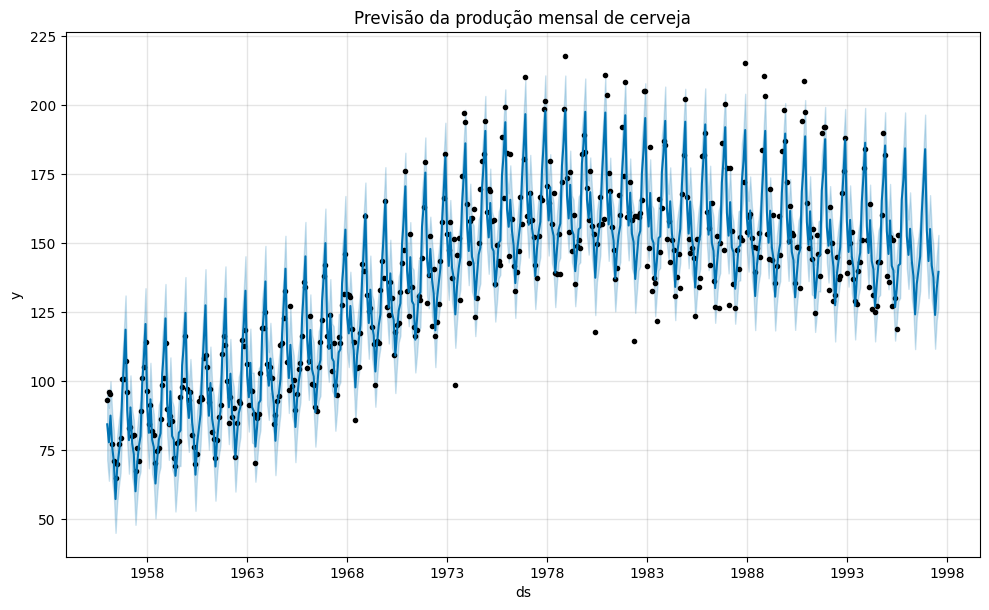

In [8]:
# 7. Gerar previsões
previsao = modelo.predict(futuro)

# Visualizar previsão
modelo.plot(previsao)
plt.title('Previsão da produção mensal de cerveja')
plt.show()


In [9]:
# 8. Exibir a tabela com as previsões (últimos 24 meses)
previsao_tabela = previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24)
previsao_tabela.reset_index(drop=True, inplace=True)
previsao_tabela.head()


,ds,yhat,yhat_lower,yhat_upper
0,1995-09-01,142.438197,130.059625,155.061194
1,1995-10-01,165.747400,153.374358,177.191446
2,1995-11-01,172.916438,161.308199,185.864687
3,1995-12-01,184.290159,172.144553,197.295528
4,1996-01-01,152.477820,140.865467,165.029788
